In [13]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

## 02/22/2020
Jingrui got some simulation results from new Prismatic v1.2, which seems to have produced results that is not normalized, CBED does not add up to 1.

In [122]:
# New simulaton with -TE=0, -F=20
f = h5py.File('/srv/home/chenyu/antisite/PRISMATIC_12/Comparison/New/STO_noTE_0FP_3')
dataset = f['4DSTEM_simulation']['data']['datacubes']['CBED_array_depth0003']['datacube']
print(dataset.shape)

(21, 21, 328, 328)


In [123]:
path = '/srv/home/chenyu/antisite/PRISMATIC_12/Comparison/Old/noFP/scratch/0.0_0.0mrad/'
base_name = 'depth0_slice3'
base_ext = '_FPavg.npy'
array_size = (21,21)  # real space array size for single unit cell
imsize = (np.load(path+base_name+'_X0_Y0'+base_ext)).shape
out_sz = array_size + imsize
output = np.zeros(out_sz,dtype=np.float32)
for x in range(array_size[0]):
        for y in range(array_size[1]):
            output[x,y,:,:] = np.load(path+base_name+'_X'+str(x)+'_Y'+str(y)+base_ext)
output = np.squeeze(output)
print(output.shape)

(21, 21, 328, 328)


0.7324887
0.73248875


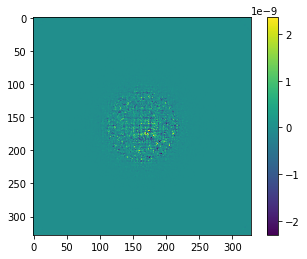

In [124]:
plt.imshow(output[10,10,:,:] - dataset[10,10,:,:])
print(np.sum(output[10,10,:,:]))
print(np.sum(dataset[10,10,:,:]))
plt.colorbar()

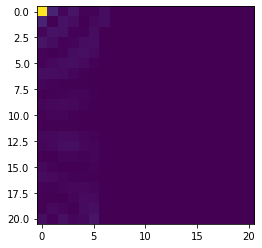

In [111]:
plt.imshow(dataset[:,:,10,10])